# 07 Fine tuning

In this notebook, we use cross-validation to fine tune the hyperparameters of the logistic regression function, starting with parameters that gave the best sumbission so far.

In [6]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Imports
import sys
import os

import numpy as np

from data_loading import load_data
from models import logistic_regression
from train_pipeline import grid_search_with_cross_validation

#### Data loading and std processing

In [3]:
# Load and preprocessed data
data_path = "../data"
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path, preprocessed=True)

Loading raw data...
Data loaded.
Preprocessing data...
Data preprocessed.


#### Logistic Regresion Cross Val

In [8]:
# Model parameters
# Grid search for hyperparameters
gammas = [0.1, 0.01]
thresholds = [0.2, 0.5, 0.7]

max_iters = 500
class_weights = [1, 5]

hyperparameters_ranges = {
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [max_iters],
    "class_weight": class_weights,
    "patience": [50]
}


Early stopping at iteration 94 due to no improvement.
Fold 1/3, Threshold: 0.2, F1 Score: 0.2926
Fold 1/3, Threshold: 0.5, F1 Score: 0.3798
Fold 1/3, Threshold: 0.7, F1 Score: 0.3371
Early stopping at iteration 177 due to no improvement.
Fold 2/3, Threshold: 0.2, F1 Score: 0.3102
Fold 2/3, Threshold: 0.5, F1 Score: 0.3981
Fold 2/3, Threshold: 0.7, F1 Score: 0.3659
Early stopping at iteration 177 due to no improvement.
Fold 3/3, Threshold: 0.2, F1 Score: 0.0892
Fold 3/3, Threshold: 0.5, F1 Score: 0.0017
Fold 3/3, Threshold: 0.7, F1 Score: 0.0000
********************
New best F1 Score: 0.2307 with parameters {'gamma': 0.1, 'max_iters': 500, 'class_weight': 1, 'patience': 50, 'threshold': 0.2}
********************
********************
New best F1 Score: 0.2598 with parameters {'gamma': 0.1, 'max_iters': 500, 'class_weight': 1, 'patience': 50, 'threshold': 0.5}
********************
Early stopping at iteration 65 due to no improvement.
Fold 1/3, Threshold: 0.2, F1 Score: 0.0000
Fold 1/3, Th

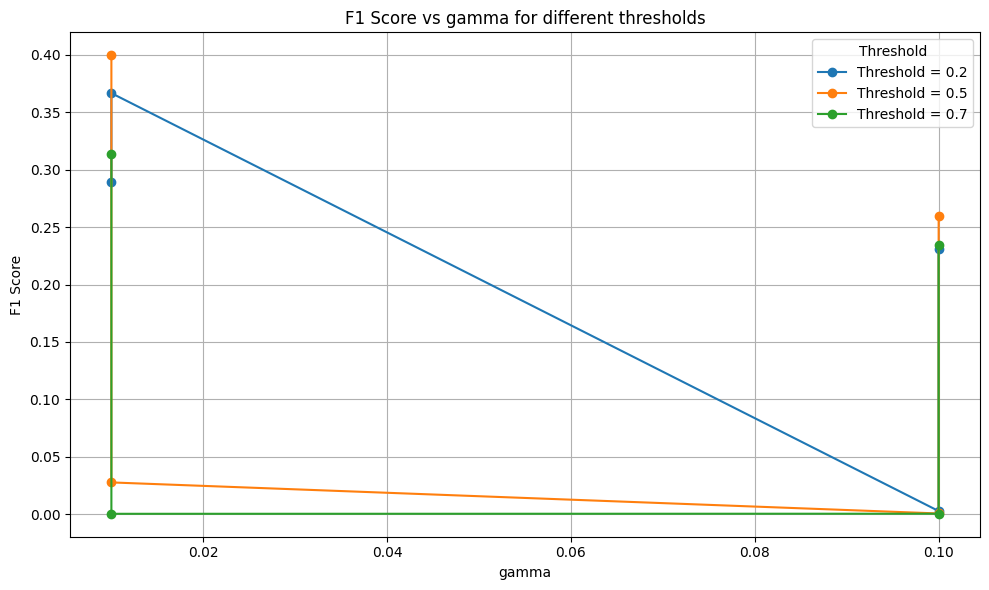

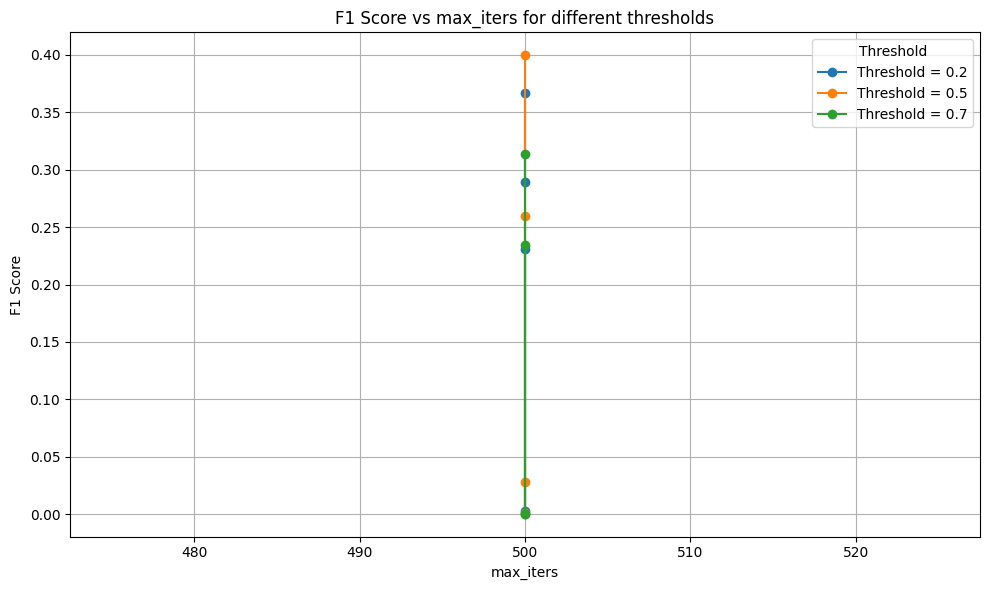

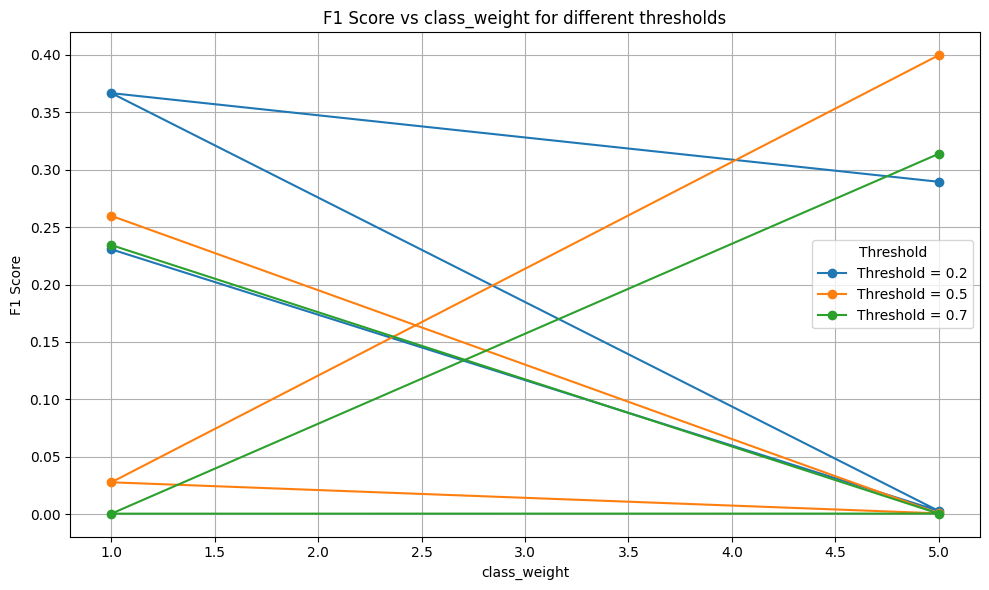

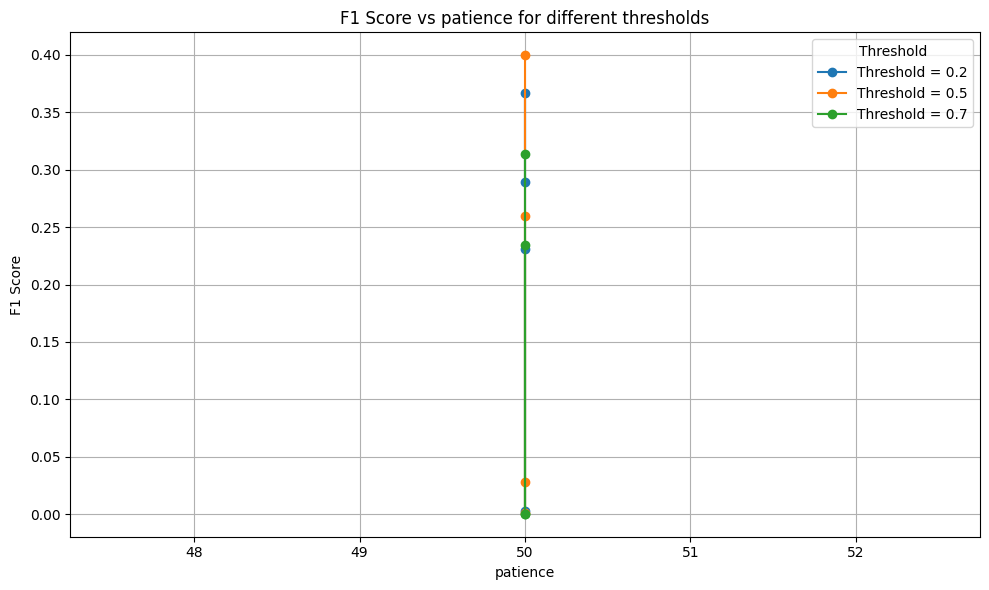

In [10]:
# Grid search with cross validation
best_params, best_avg_f1_score, best_avg_accuracy, best_weights = grid_search_with_cross_validation(
    x_train, y_train, logistic_regression, hyperparameters_ranges, n_splits=3, verbose=True
)

In [17]:
# Model parameters
# Fine tuning gamma
best_gamma = best_params["gamma"]
gammas = np.linspace(best_gamma - 0.005, best_gamma + 0.005, 5)
thresholds = np.linspace(best_params["threshold"] - 0.1, best_params["threshold"] + 0.1, 5)
max_iters = 500

hyperparameters_ranges = {
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [max_iters],
    "class_weight": [best_params["class_weight"]],
    "patience": [50],
}


Fold 1/3, Threshold: 0.4, F1 Score: 0.3650
Fold 1/3, Threshold: 0.45, F1 Score: 0.3802
Fold 1/3, Threshold: 0.5, F1 Score: 0.3851
Fold 1/3, Threshold: 0.55, F1 Score: 0.3787
Fold 1/3, Threshold: 0.6, F1 Score: 0.3574
Fold 2/3, Threshold: 0.4, F1 Score: 0.3682
Fold 2/3, Threshold: 0.45, F1 Score: 0.3795
Fold 2/3, Threshold: 0.5, F1 Score: 0.3852
Fold 2/3, Threshold: 0.55, F1 Score: 0.3814
Fold 2/3, Threshold: 0.6, F1 Score: 0.3620
Fold 3/3, Threshold: 0.4, F1 Score: 0.3699
Fold 3/3, Threshold: 0.45, F1 Score: 0.3847
Fold 3/3, Threshold: 0.5, F1 Score: 0.3932
Fold 3/3, Threshold: 0.55, F1 Score: 0.3884
Fold 3/3, Threshold: 0.6, F1 Score: 0.3688
********************
New best F1 Score: 0.3677 with parameters {'gamma': np.float64(0.005), 'max_iters': 500, 'class_weight': 5, 'patience': 50, 'threshold': np.float64(0.4)}
********************
********************
New best F1 Score: 0.3815 with parameters {'gamma': np.float64(0.005), 'max_iters': 500, 'class_weight': 5, 'patience': 50, 'thresho

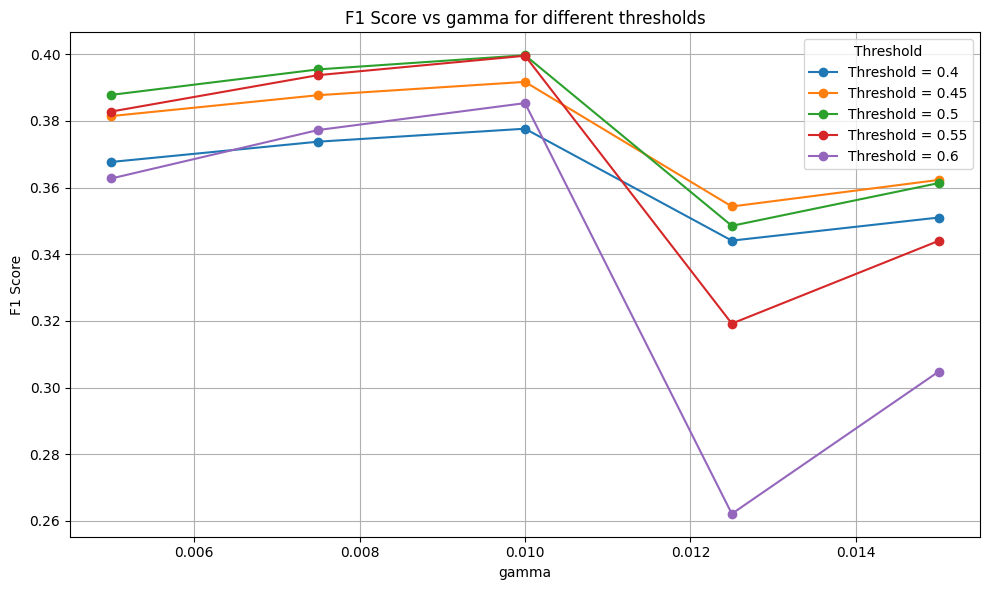

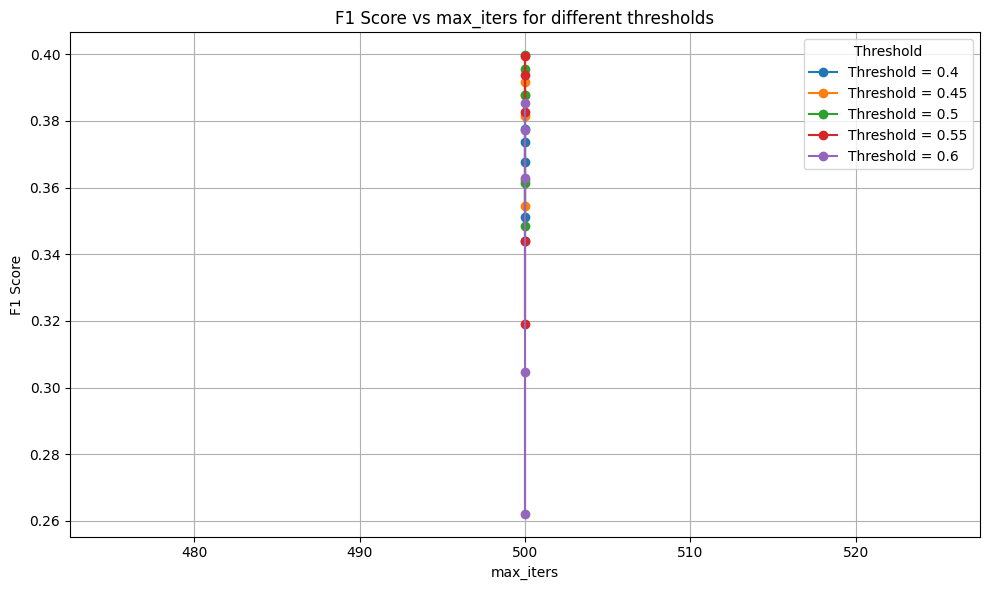

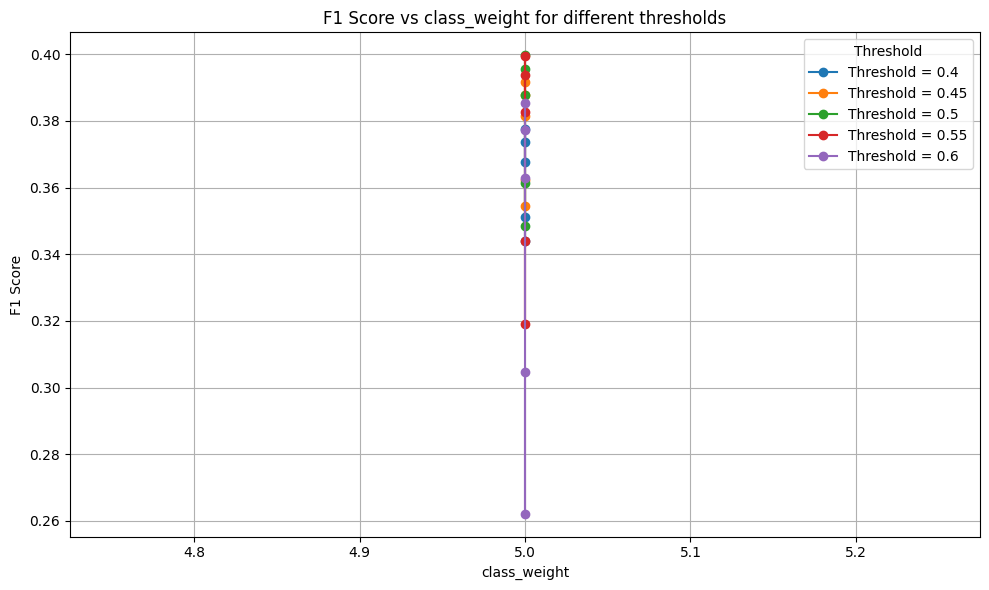

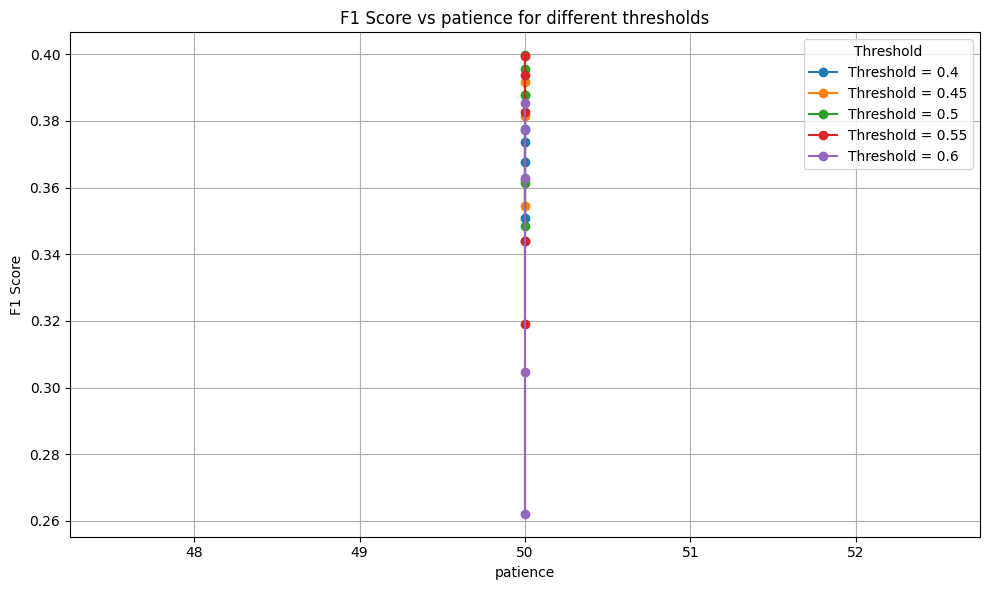

In [18]:
# Grid search with cross validation
best_params, best_avg_f1_score, best_avg_accuracy, best_weights = grid_search_with_cross_validation(
    x_train, y_train, logistic_regression, hyperparameters_ranges, n_splits=3, verbose=True
)

Fold 1/3, Threshold: 0.4, F1 Score: 0.3480
Fold 1/3, Threshold: 0.45, F1 Score: 0.3301
Fold 1/3, Threshold: 0.5, F1 Score: 0.2712
Fold 1/3, Threshold: 0.55, F1 Score: 0.1907
Fold 1/3, Threshold: 0.6, F1 Score: 0.0968
Fold 2/3, Threshold: 0.4, F1 Score: 0.3463
Fold 2/3, Threshold: 0.45, F1 Score: 0.3251
Fold 2/3, Threshold: 0.5, F1 Score: 0.2698
Fold 2/3, Threshold: 0.55, F1 Score: 0.1885
Fold 2/3, Threshold: 0.6, F1 Score: 0.1042
Fold 3/3, Threshold: 0.4, F1 Score: 0.3443
Fold 3/3, Threshold: 0.45, F1 Score: 0.3229
Fold 3/3, Threshold: 0.5, F1 Score: 0.2679
Fold 3/3, Threshold: 0.55, F1 Score: 0.1846
Fold 3/3, Threshold: 0.6, F1 Score: 0.0979
********************
New best F1 Score: 0.3462 with parameters {'gamma': 0.001, 'max_iters': 500, 'class_weight': np.float64(4.0), 'patience': 50, 'threshold': np.float64(0.4)}
********************
Fold 1/3, Threshold: 0.4, F1 Score: 0.3435
Fold 1/3, Threshold: 0.45, F1 Score: 0.3392
Fold 1/3, Threshold: 0.5, F1 Score: 0.3110
Fold 1/3, Threshold: 

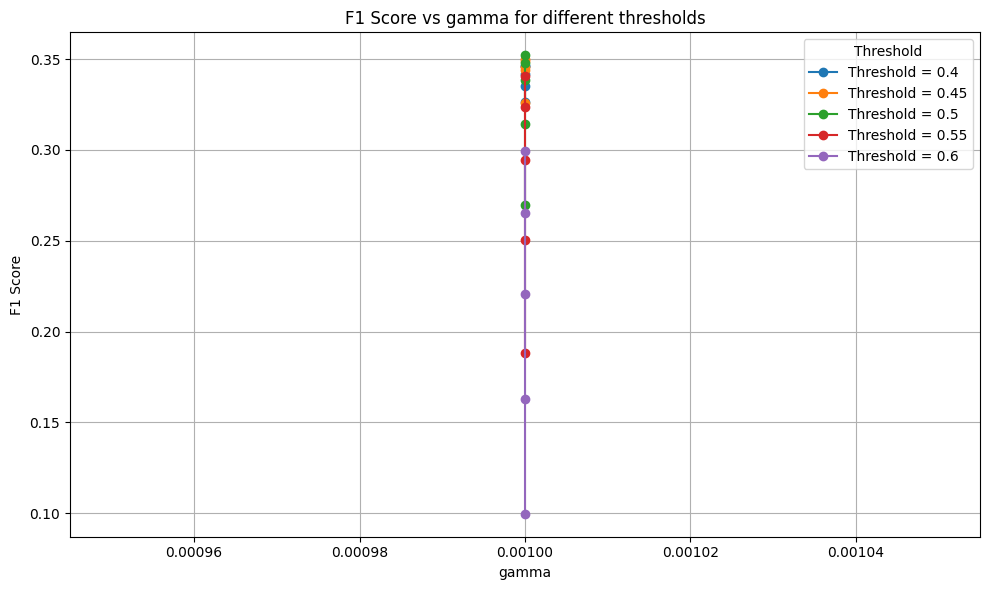

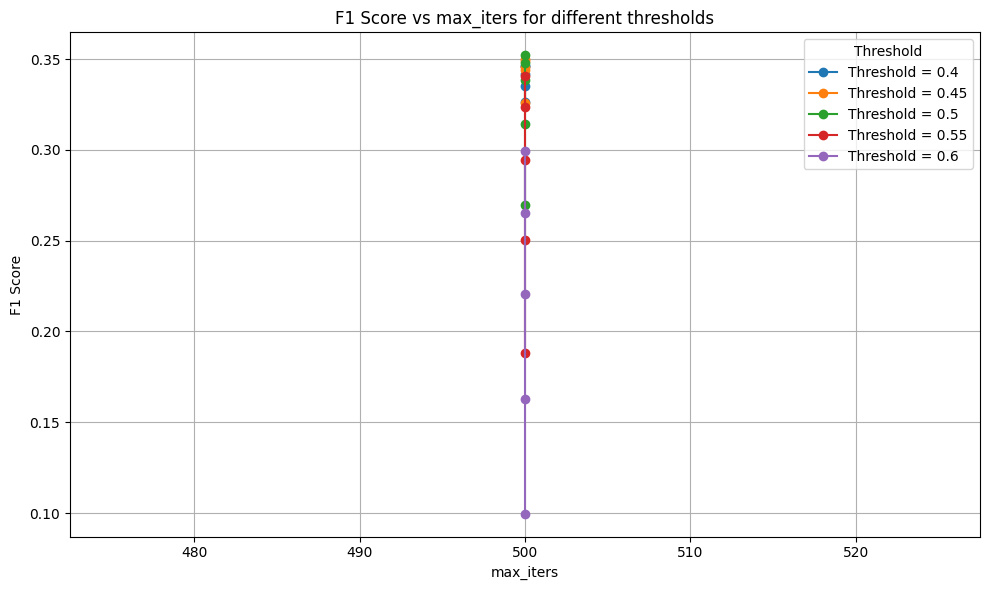

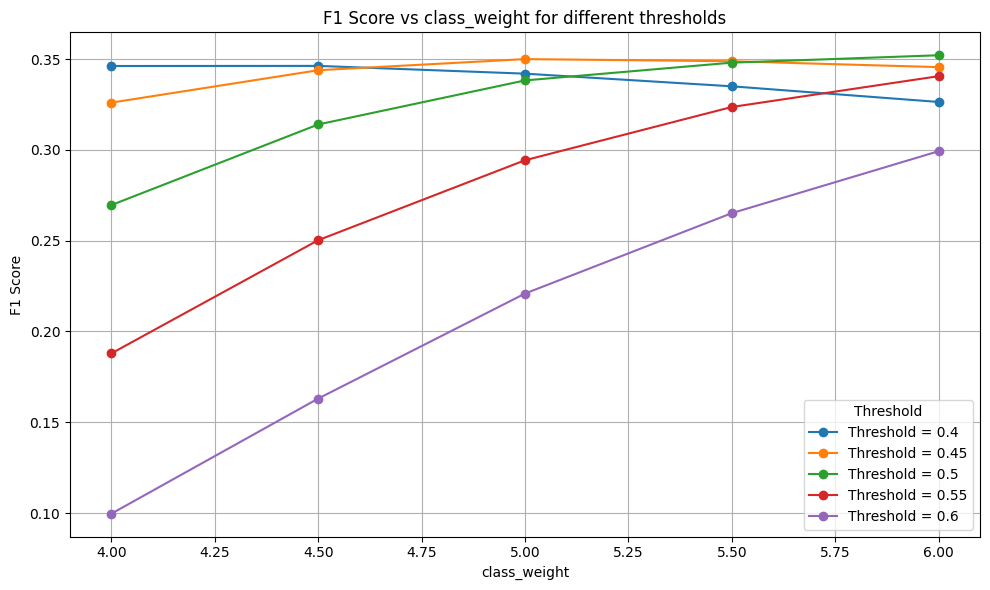

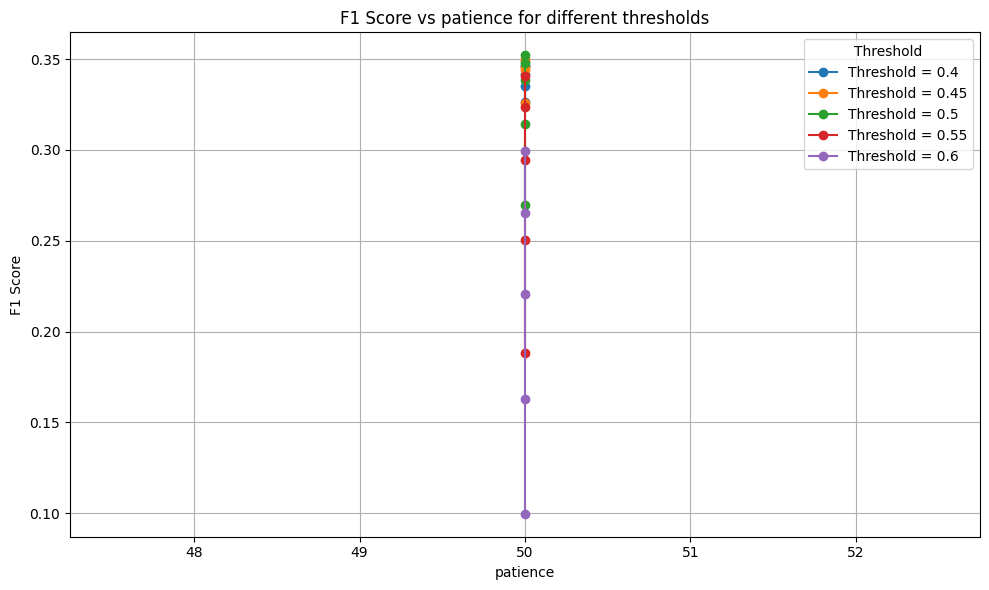

In [20]:
# Model parameters
# Fine tuning gamma
gammas = [0.001]
thresholds = np.linspace(best_params["threshold"] - 0.1, best_params["threshold"] + 0.1, 5)
class_weights = np.linspace(best_params["class_weight"] - 1, best_params["class_weight"] + 1, 5)
max_iters_range = 500
patiences = [50]
n_splits = 3
verbose = True

hyperparameters_ranges = {
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": max_iters_range,
    "class_weight": class_weights,
    "patience": patiences,
}

# Grid search with cross validation
best_params, best_avg_f1_score, best_avg_accuracy, best_weights = grid_search_with_cross_validation(
    x_train, y_train, logistic_regression, hyperparameters_ranges, n_splits=n_splits, verbose=verbose
)

In [21]:
# Model parameters
# Fine tuning gamma
gammas = [0.001]
thresholds = np.linspace(best_params["threshold"] - 0.2, best_params["threshold"] + 0.2, 10).round(1)
class_weights = np.linspace(best_params["class_weight"] - 0.5, best_params["class_weight"] + 2.5, 5)
max_iters = np.array([500, 1000]).astype(int)

hyperparameters_ranges = {
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [max_iters],
    "class_weight": class_weights,
    "patience": [50],
}

print(f'thresholds: {hyperparameters_ranges["threshold"]}')

# Grid search with cross validation
#best_params, best_avg_f1_score, best_avg_accuracy, best_weights = grid_search_with_cross_validation(
#    x_train, y_train, logistic_regression, hyperparameters_ranges, n_splits=3, verbose=True
#)

KeyboardInterrupt: 

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
from datetime import datetime
from itertools import product
from typing import Dict, List, Tuple
from tqdm.notebook import tqdm  # For Jupyter Notebook progress bars


def sigmoid(z: np.ndarray) -> np.ndarray:
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))


def compute_loss_logistic(y: np.ndarray, x: np.ndarray, w: np.ndarray) -> float:
    """Compute the logistic loss."""
    pred = sigmoid(x.dot(w))
    # Adding a small epsilon to prevent log(0)
    epsilon = 1e-15
    pred = np.clip(pred, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    return loss


def predict_labels(w: np.ndarray, x: np.ndarray, threshold: float = 0.5) -> np.ndarray:
    """Predict labels using learned weights and a threshold."""
    pred_probs = sigmoid(x.dot(w))
    return (pred_probs >= threshold).astype(int)


def calculate_f1_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Calculate the F1 score."""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    if tp + fp + fn == 0:
        return 0.0
    precision = tp / (tp + fp + 1e-15)
    recall = tp / (tp + fn + 1e-15)
    if precision + recall == 0:
        return 0.0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1


def grid_search_with_cross_validation_logistic_regression(
    x: np.ndarray,
    y: np.ndarray,
    param_grid: Dict[str, List],
    n_splits: int = 5,
    verbose: bool = False,
) -> Tuple[Dict[str, float], float, np.ndarray, Dict]:
    """
    Perform grid search with stratified cross-validation to find the best hyperparameters
    based on the best average F1 score across folds and generate visualizations of the tuning.
    """
    np.random.seed(42)  # For reproducibility
    threshold_values = param_grid.get("threshold", [0.5])
    model_param_grid = {k: v for k, v in param_grid.items() if k != "threshold"}

    print(f"Model parameters grid: {model_param_grid}")
    total_combinations = len(list(product(*model_param_grid.values())))

    best_avg_f1_score = -np.inf
    best_params = None
    best_weights = None
    best_model_data = {}  # To store plotting data and final weights

    tuning_results = {
        "params": [],
        "avg_f1_scores": [],
        "thresholds": [],
        "f1_scores_by_param": defaultdict(lambda: defaultdict(list)),
        "test_loss_by_param": defaultdict(lambda: defaultdict(list)),
        "roc_data": defaultdict(list),
        "pr_data": defaultdict(list),
        "confusion_matrices": [],
        "coefficients": [],
        "test_loss_per_iteration": defaultdict(list),
        "param_combinations": [],
    }

    model_param_combinations = list(product(*model_param_grid.values()))
    param_names = list(model_param_grid.keys())

    color_palette = sns.color_palette("hsv", len(model_param_combinations))

    # Use tqdm for progress bar over parameter combinations
    for idx, param_values in enumerate(tqdm(model_param_combinations, desc="Grid Search Progress")):
        params = dict(zip(param_names, param_values))
        f1_scores_by_threshold = {threshold: [] for threshold in threshold_values}
        test_losses_by_threshold = {threshold: [] for threshold in threshold_values}

        # Storage for ROC and PR data across folds
        fold_roc_data = []
        fold_pr_data = []
        fold_confusion_matrices = []
        fold_coefficients = []
        fold_test_loss_iterations = []  # Store test losses per iteration

        # Stratified K-Fold Cross-Validation
        unique_classes = np.unique(y)
        class_indices = {cls: np.where(y == cls)[0] for cls in unique_classes}
        folds = [np.array([], dtype=int) for _ in range(n_splits)]

        for cls in unique_classes:
            indices = class_indices[cls]
            np.random.shuffle(indices)
            splits = np.array_split(indices, n_splits)
            for fold_idx in range(n_splits):
                folds[fold_idx] = np.concatenate((folds[fold_idx], splits[fold_idx]))

        for fold_idx in range(n_splits):
            test_indices = folds[fold_idx]
            train_indices = np.setdiff1d(np.arange(len(y)), test_indices)

            x_train, y_train = x[train_indices], y[train_indices]
            x_test, y_test = x[test_indices], y[test_indices]

            w = np.zeros(x_train.shape[1])
            best_test_loss = np.inf
            no_improvement = 0

            max_iters = params.get("max_iters", 100)
            gamma = params.get("gamma", 0.1)
            class_weight = params.get("class_weight", 1.0)
            patience = params.get("patience", 10)

            train_losses = []
            test_losses = []

            for iter_ in range(max_iters):
                try:
                    pred = sigmoid(x_train.dot(w))
                    error = pred - y_train
                    weighted_error = np.where(y_train == 1, class_weight * error, error)
                    gradient = x_train.T.dot(weighted_error) / len(y_train)
                    w -= gamma * gradient

                    train_loss = compute_loss_logistic(y_train, x_train, w)
                    test_loss = compute_loss_logistic(y_test, x_test, w)

                    train_losses.append(train_loss)
                    test_losses.append(test_loss)

                    if test_loss < best_test_loss:
                        best_test_loss = test_loss
                        no_improvement = 0
                    else:
                        no_improvement += 1
                        if no_improvement >= patience:
                            if verbose:
                                print(f"Early stopping at iteration {iter_} due to no improvement.")
                            break

                except Exception as e:
                    if verbose:
                        print(f"Error during training iteration {iter_}: {e}")
                    break

            fold_coefficients.append(w.copy())
            fold_test_loss_iterations.append(test_losses)

            # Evaluation after training
            for threshold in threshold_values:
                try:
                    pred_probs = sigmoid(x_test.dot(w))
                    y_pred = (pred_probs >= threshold).astype(int)
                    f1_score = calculate_f1_score(y_test, y_pred)
                    f1_scores_by_threshold[threshold].append(f1_score)
                    test_losses_by_threshold[threshold].append(best_test_loss)

                    # Compute ROC curve data
                    fpr, tpr, roc_thresholds = compute_roc_curve(y_test, pred_probs)
                    fold_roc_data.append((fpr, tpr))

                    # Compute Precision-Recall curve data
                    precision, recall, pr_thresholds = compute_precision_recall_curve(y_test, pred_probs)
                    fold_pr_data.append((precision, recall))

                    # Compute Confusion Matrix
                    cm = compute_confusion_matrix(y_test, y_pred)
                    fold_confusion_matrices.append(cm)

                    if verbose:
                        print(
                            f"Fold {fold_idx + 1}/{n_splits}, Threshold: {threshold}, "
                            f"F1 Score: {f1_score:.4f}, Test Loss: {best_test_loss:.4f}"
                        )
                except Exception as e:
                    if verbose:
                        print(f"Error during evaluation: {e}")

        # Store ROC and PR data
        tuning_results["roc_data"][str(params)].extend(fold_roc_data)
        tuning_results["pr_data"][str(params)].extend(fold_pr_data)
        tuning_results["confusion_matrices"].extend(fold_confusion_matrices)
        tuning_results["coefficients"].extend(fold_coefficients)
        tuning_results["test_loss_per_iteration"][str(params)].extend(fold_test_loss_iterations)
        tuning_results["param_combinations"].append((str(params), color_palette[idx]))

        # After all folds, compute average F1-scores for each threshold
        avg_f1_scores = {}
        avg_test_losses = {}
        for threshold in threshold_values:
            avg_f1_score = np.mean(f1_scores_by_threshold[threshold])
            avg_test_loss = np.mean(test_losses_by_threshold[threshold])
            avg_f1_scores[threshold] = avg_f1_score
            avg_test_losses[threshold] = avg_test_loss

            # Store results for plotting
            tuning_results["params"].append(params)
            tuning_results["avg_f1_scores"].append(avg_f1_score)
            tuning_results["thresholds"].append(threshold)

            for param_name, param_value in params.items():
                tuning_results["f1_scores_by_param"][threshold][param_name].append((param_value, avg_f1_score))
                tuning_results["test_loss_by_param"][threshold][param_name].append((param_value, avg_test_loss))

        # For this parameter combination, find the threshold that gives the best average F1-score
        best_threshold_for_params = max(avg_f1_scores, key=avg_f1_scores.get)
        best_avg_f1_score_for_params = avg_f1_scores[best_threshold_for_params]

        # Compare to the overall best average F1-score
        if best_avg_f1_score_for_params > best_avg_f1_score:
            best_avg_f1_score = best_avg_f1_score_for_params
            best_params = {**params, "threshold": best_threshold_for_params}
            best_weights = w.copy()

            # Store plotting data for the best model
            best_model_data = {
                "weights": best_weights,
                "params": best_params,
                "test_loss_per_iteration": fold_test_loss_iterations,  # List of test losses per fold
            }

            # Print new best average F1-score found
            print(f"New best average F1 Score: {best_avg_f1_score:.4f} with parameters {best_params}")

    # Results directory
    unique_id = f"{datetime.now().strftime('%Y%m%d%H%M%S')}"
    base_path = "../results"
    res_path = os.path.join(base_path, "grid_search_cv", unique_id)
    os.makedirs(res_path, exist_ok=True)

    # Save best model data to file
    np.savez(os.path.join(res_path, "best_model_data.npz"), **best_model_data)

    # Plotting Test Loss vs Iterations for the best model
    # Average test loss over folds at each iteration
    max_length = max(len(losses) for losses in best_model_data["test_loss_per_iteration"])
    all_losses = np.zeros((len(best_model_data["test_loss_per_iteration"]), max_length))
    for i, losses in enumerate(best_model_data["test_loss_per_iteration"]):
        all_losses[i, : len(losses)] = losses
        if len(losses) < max_length:
            all_losses[i, len(losses) :] = losses[-1]  # Pad with last value
    mean_test_loss = np.mean(all_losses, axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(mean_test_loss) + 1), mean_test_loss, label="Best Model", color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Test Loss")
    plt.title(f"Test Loss vs Iterations (Best Model, Threshold = {best_params['threshold']})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(res_path, "best_model_test_loss_iterations.png"))
    plt.close()

    # Plotting F1-Score and Test Loss against each parameter for each threshold
    for param_name in model_param_grid.keys():
        plt.figure(figsize=(12, 5))

        # Plot F1-Score
        plt.subplot(1, 2, 1)
        for threshold in threshold_values:
            if param_name in tuning_results["f1_scores_by_param"][threshold]:
                values_and_scores = tuning_results["f1_scores_by_param"][threshold][param_name]
                values, scores = zip(*values_and_scores)
                sns.lineplot(x=values, y=scores, marker="o", label=f"Threshold = {threshold}")
        plt.xlabel(param_name)
        plt.ylabel("F1 Score")
        plt.title(f"F1 Score vs {param_name}")
        plt.legend(title="Threshold")
        plt.grid(True)

        # Plot Test Loss
        plt.subplot(1, 2, 2)
        for threshold in threshold_values:
            if param_name in tuning_results["test_loss_by_param"][threshold]:
                values_and_losses = tuning_results["test_loss_by_param"][threshold][param_name]
                values, losses = zip(*values_and_losses)
                sns.lineplot(x=values, y=losses, marker="o", label=f"Threshold = {threshold}")
        plt.xlabel(param_name)
        plt.ylabel("Test Loss")
        plt.title(f"Test Loss vs {param_name}")
        plt.legend(title="Threshold")
        plt.grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(res_path, f"{param_name}_metrics.png"))
        plt.close()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    for (params_str, color), roc_datas in zip(
        tuning_results["param_combinations"], tuning_results["roc_data"].values()
    ):
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        for fpr, tpr in roc_datas:
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            tprs.append(interp_tpr)
        mean_tpr = np.mean(tprs, axis=0)
        plt.plot(mean_fpr, mean_tpr, label=params_str, color=color)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(title="Parameters", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(res_path, "roc_curve.png"))
    plt.close()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for (params_str, color), pr_datas in zip(tuning_results["param_combinations"], tuning_results["pr_data"].values()):
        mean_recall = np.linspace(0, 1, 100)
        precisions = []
        for precision, recall in pr_datas:
            interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
            precisions.append(interp_precision)
        mean_precision = np.mean(precisions, axis=0)
        plt.plot(mean_recall, mean_precision, label=params_str, color=color)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(title="Parameters", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(res_path, "precision_recall_curve.png"))
    plt.close()

    # Plot Confusion Matrix Heatmap
    total_cm = sum(tuning_results["confusion_matrices"])
    plt.figure(figsize=(6, 5))
    sns.heatmap(total_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig(os.path.join(res_path, "confusion_matrix.png"))
    plt.close()

    # Plot Coefficient Analysis
    avg_coefficients = np.mean(tuning_results["coefficients"], axis=0)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=np.arange(len(avg_coefficients)), y=avg_coefficients, palette="viridis")
    plt.xlabel("Feature Index")
    plt.ylabel("Coefficient Value")
    plt.title("Coefficient Analysis")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(res_path, "coefficient_analysis.png"))
    plt.close()

    if verbose:
        print("\nBest Parameters:", best_params)
        print(f"Best Average F1 Score: {best_avg_f1_score:.4f}")

    return best_params, best_avg_f1_score, best_weights, best_model_data


# Additional helper functions remain the same
def compute_roc_curve(y_true: np.ndarray, y_scores: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Compute ROC curve data without sklearn."""
    thresholds = np.sort(np.unique(y_scores))
    thresholds = np.append(thresholds, thresholds[-1] + 1)  # Ensure threshold includes max value
    tprs = []
    fprs = []
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        tpr = tp / (tp + fn + 1e-15)
        fpr = fp / (fp + tn + 1e-15)
        tprs.append(tpr)
        fprs.append(fpr)
    return np.array(fprs), np.array(tprs), thresholds


def compute_precision_recall_curve(
    y_true: np.ndarray, y_scores: np.ndarray
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Compute Precision-Recall curve data without sklearn."""
    thresholds = np.sort(np.unique(y_scores))
    thresholds = np.append(thresholds, thresholds[-1] + 1)  # Ensure threshold includes max value
    precisions = []
    recalls = []
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        precision = tp / (tp + fp + 1e-15)
        recall = tp / (tp + fn + 1e-15)
        precisions.append(precision)
        recalls.append(recall)
    return np.array(precisions), np.array(recalls), thresholds


def compute_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """Compute confusion matrix without sklearn."""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    cm = np.array([[tn, fp], [fn, tp]])
    return cm

In [80]:
gammas = [0.01, 0.01, 0.1,]
thresholds = [0.3, 0.5, 0.6, 0.7]
class_weights = [1, 5, 7, 9]
hyperparameters_ranges = {
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [250],
    "class_weight": class_weights,
    "patience": [25],
}

# check by prinitng the hyperparameters_ranges
print(hyperparameters_ranges)

{'gamma': [0.01, 0.01, 0.1], 'threshold': [0.3, 0.5, 0.6, 0.7], 'max_iters': [250], 'class_weight': [1, 5, 7, 9], 'patience': [25]}


In [81]:
best_params, best_avg_f1_score, best_weights, best_model_data = grid_search_with_cross_validation_logistic_regression(
    x_train, y_train, hyperparameters_ranges, n_splits=3, verbose=True
)

Model parameters grid: {'gamma': [0.01, 0.01, 0.1], 'max_iters': [250], 'class_weight': [1, 5, 7, 9], 'patience': [25]}


Grid Search Progress:   0%|          | 0/12 [00:00<?, ?it/s]

Fold 1/3, Threshold: 0.3, F1 Score: 0.1690, Test Loss: 0.2471
Fold 1/3, Threshold: 0.5, F1 Score: 0.0039, Test Loss: 0.2471
Fold 1/3, Threshold: 0.6, F1 Score: 0.0006, Test Loss: 0.2471
Fold 1/3, Threshold: 0.7, F1 Score: 0.0000, Test Loss: 0.2471
Fold 2/3, Threshold: 0.3, F1 Score: 0.1631, Test Loss: 0.2463
Fold 2/3, Threshold: 0.5, F1 Score: 0.0052, Test Loss: 0.2463
Fold 2/3, Threshold: 0.6, F1 Score: 0.0002, Test Loss: 0.2463
Fold 2/3, Threshold: 0.7, F1 Score: 0.0000, Test Loss: 0.2463
Fold 3/3, Threshold: 0.3, F1 Score: 0.1679, Test Loss: 0.2469
Fold 3/3, Threshold: 0.5, F1 Score: 0.0056, Test Loss: 0.2469
Fold 3/3, Threshold: 0.6, F1 Score: 0.0004, Test Loss: 0.2469
Fold 3/3, Threshold: 0.7, F1 Score: 0.0000, Test Loss: 0.2469
New best average F1 Score: 0.1667 with parameters {'gamma': 0.01, 'max_iters': 250, 'class_weight': 1, 'patience': 25, 'threshold': 0.3}
Early stopping at iteration 25 due to no improvement.
Fold 1/3, Threshold: 0.3, F1 Score: 0.2801, Test Loss: 0.3885
Fol

/var/folders/qk/wvk3hfs54kd60hgxv0w3cgtc0000gn/T/ipykernel_47548/2838579461.py:361: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(avg_coefficients)), y=avg_coefficients, palette="viridis")



Best Parameters: {'gamma': 0.01, 'max_iters': 250, 'class_weight': 7, 'patience': 25, 'threshold': 0.6}
Best Average F1 Score: 0.3925


In [32]:
gammas = [0.001, 0.01, 0.1]
hyperparameters_ranges = {
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [500],
    "class_weight": class_weights,
    "patience": [50]
}

best_params, best_avg_f1_score, best_weights = grid_search_with_cross_validation_logistic_regression(
    x_train, y_train, hyperparameters_ranges, n_splits=3, verbose=True
)

Model parameters grid: {'gamma': [0.001, 0.01, 0.1], 'max_iters': [500], 'class_weight': array([5. , 5.5, 6. , 6.5, 7. ]), 'patience': [50]}


Grid Search Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Fold 1/3, Threshold: 0.3, F1 Score: 0.2943, Test Loss: 0.3830
Fold 1/3, Threshold: 0.3, F1 Score: 0.2943, Test Loss: 0.3830
Fold 1/3, Threshold: 0.4, F1 Score: 0.3421, Test Loss: 0.3830
Fold 1/3, Threshold: 0.4, F1 Score: 0.3421, Test Loss: 0.3830
Fold 1/3, Threshold: 0.5, F1 Score: 0.3365, Test Loss: 0.3830
Fold 1/3, Threshold: 0.5, F1 Score: 0.3365, Test Loss: 0.3830
Fold 1/3, Threshold: 0.6, F1 Score: 0.2238, Test Loss: 0.3830
Fold 1/3, Threshold: 0.6, F1 Score: 0.2238, Test Loss: 0.3830
Fold 1/3, Threshold: 0.7, F1 Score: 0.0496, Test Loss: 0.3830
Fold 1/3, Threshold: 0.7, F1 Score: 0.0496, Test Loss: 0.3830
Fold 2/3, Threshold: 0.3, F1 Score: 0.2958, Test Loss: 0.3815
Fold 2/3, Threshold: 0.3, F1 Score: 0.2958, Test Loss: 0.3815
Fold 2/3, Threshold: 0.4, F1 Score: 0.3442, Test Loss: 0.3815
Fold 2/3, Threshold: 0.4, F1 Score: 0.3442, Test Loss: 0.3815
Fold 2/3, Threshold: 0.5, F1 Score: 0.3403, Test Loss: 0.3815
Fold 2/3, Threshold: 0.5, F1 Score: 0.3403, Test Loss: 0.3815
Fold 2/3

In [41]:
# now training on the whole training dataset with best parameters using logistic regression
best_gamma = best_params["gamma"]
best_threshold = best_params["threshold"]
best_class_weight = best_params["class_weight"]
max_iters = best_params["max_iters"]*3
patience = best_params["patience"]

w = np.zeros(x_train.shape[1])

hyperparameters_best_model= {
    "gamma": best_gamma,
    "threshold": best_threshold,
    "max_iters": max_iters,
    "class_weight": best_class_weight,
    "patience": patience,
    "initial_w": w
}




In [38]:
from utils import stratified_split

# Stratified split
x_train_new, y_train_new, train_ids_new, x_val, y_val, val_ids = stratified_split(x_train, y_train, train_ids)

Model specific parameters:
    gamma: 0.01
    max_iters: 1500
    class_weight: 7.0
    patience: 50

Training model...
Training done in 2 min 29.86 s with last loss: 0.39787


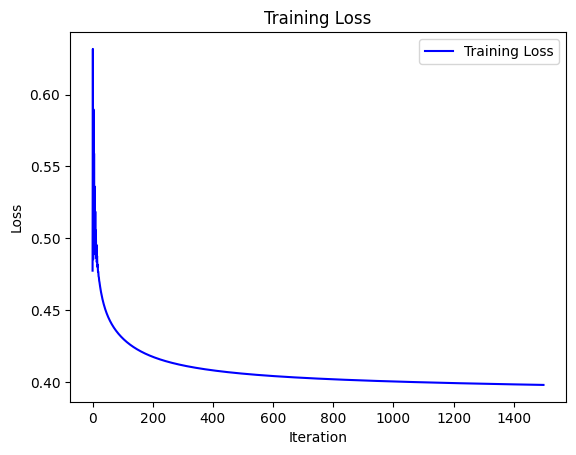

Metrics: Accuracy = 0.854, F1 Score = 0.415
Training and evaluation complete.
Results saved in ../results/logs/logistic_regression_20241031234722


In [42]:
from train_pipeline import train_and_test

(w, loss), metrics = train_and_test(x_train_new, y_train_new, x_val, y_val, logistic_regression, verbose=True, **hyperparameters_best_model)

In [49]:
w = w[0]

In [55]:
# Pipeline for creating subsmission

from helpers import create_csv_submission_custom


print(f"Best weights shape: {w.shape}")
print(f"x_test shape: {x_test.shape}")

y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)
from datetime import datetime

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute 
unique_id = f"logistic_regression_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)

Best weights shape: (440,)
x_test shape: (109379, 440)
Unique ID: logistic_regression_202411010009
Submission file ../results/submissions/logistic_regression_202411010009 created and saved in results/submissions folder.


In [56]:
from train_pipeline import train


Model specific parameters:
    gamma: 0.01
    max_iters: 10000
    class_weight: 7.0
    patience: 50
    initial_w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

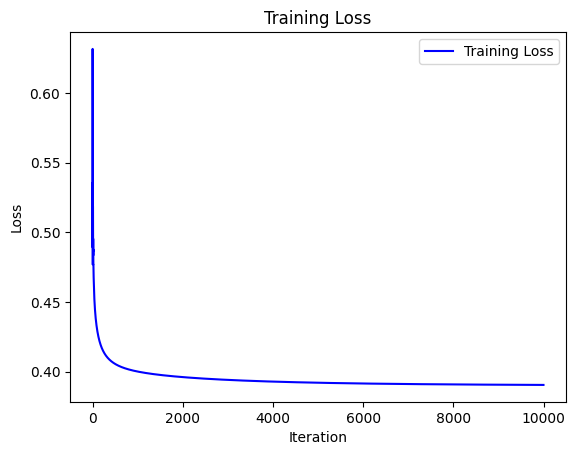

Unique ID: logistic_regression_202411010803
Submission file ../results/submissions/logistic_regression_202411010803 created and saved in results/submissions folder.


In [63]:
# change number of iteration over all the dataset
hyperparameters_best_model["max_iters"] = 10000
w, loss = train(x_train, y_train, logistic_regression, verbose=True, **hyperparameters_best_model)

# Pipeline for creating subsmission

y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute
unique_id = f"logistic_regression_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)



In [59]:
from models import reg_l2_logistic_regression, reg_l1_logistic_regression

Model specific parameters:
    gamma: 0.01
    max_iters: 10000
    class_weight: 7.0
    lambda_: 0.001

Training model...
Training done in 16 min 35.34 s with last loss: 0.39094


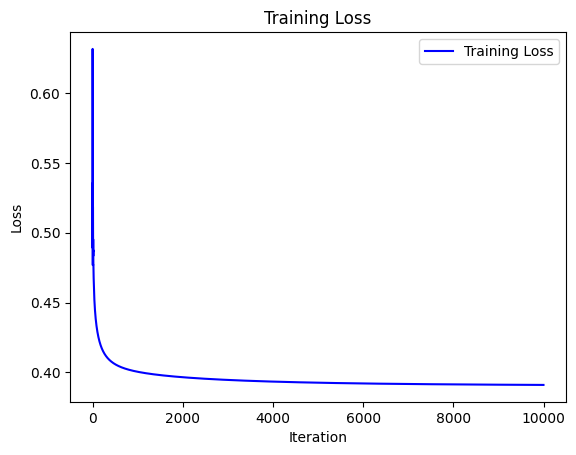

Metrics: Accuracy = 0.858, F1 Score = 0.425
Training and evaluation complete.
Results saved in ../results/logs/reg_l2_logistic_regression_20241101081943
Unique ID: logistic_regression_202411010819
Submission file ../results/submissions/logistic_regression_202411010819 created and saved in results/submissions folder.


In [64]:
# add lambda_ to the hyperparameters
hyperparameters_best_model["lambda_"] = 0.001

# train_and_test with lambda_

(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, reg_l2_logistic_regression, verbose=True, **hyperparameters_best_model
)


y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute
unique_id = f"reg_l2_log_reg_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)

Model specific parameters:
    gamma: 0.01
    max_iters: 10000
    class_weight: 7.0
    lambda_: 0.001

Training model...
Training done in 15 min 50.77 s with last loss: 0.39194


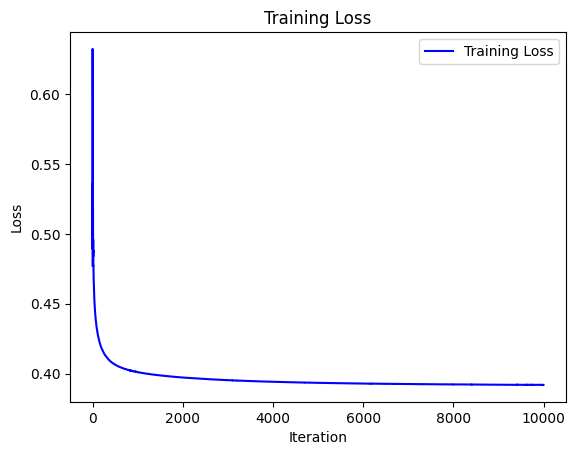

Metrics: Accuracy = 0.859, F1 Score = 0.426
Training and evaluation complete.
Results saved in ../results/logs/reg_l1_logistic_regression_20241101083534
Unique ID: logistic_regression_202411010835
Submission file ../results/submissions/logistic_regression_202411010835 created and saved in results/submissions folder.


In [65]:
# and train ant test for l1-regularized logistic regression

(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, reg_l1_logistic_regression, verbose=True, **hyperparameters_best_model
)


y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute
unique_id = f"reg_l1_log_reg_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)

Model specific parameters:
    gamma: 0.01
    max_iters: 50000
    class_weight: 7.0
    patience: 50
    initial_w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

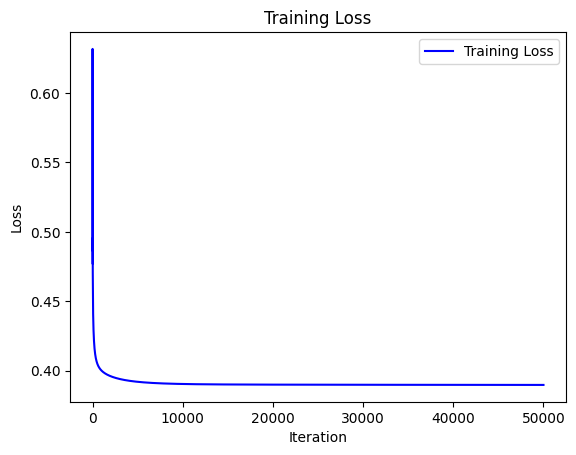

Unique ID: logistic_regression_202411011022
Submission file ../results/submissions/logistic_regression_202411011022 created and saved in results/submissions folder.


In [66]:
# change number of iteration over all the dataset
hyperparameters_best_model["gamma"] = 0.01
hyperparameters_best_model["threshold"] = 0.6
hyperparameters_best_model["class_weight"] = 7
hyperparameters_best_model["max_iters"] = 50000
hyperparameters_best_model["patience"] = 50
hyperparameters_best_model["initial_w"] = np.zeros(x_train.shape[1])

# on whole training dataset
w, loss = train(x_train, y_train, logistic_regression, verbose=True, **hyperparameters_best_model)

# Pipeline for creating subsmission

y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute
unique_id = f"logistic_regression_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)

In [69]:
print(f"The threshold is {best_threshold}")

The threshold is 0.6


In [82]:
print(f"The weights of the best model are: {w}")

The weights of the best model are: [ 3.86261393e-01 -4.86547356e-02  1.74231993e-02  7.51378852e-03
 -4.10262879e-02  5.08895619e-02 -2.68532045e-01  1.56171774e-02
  1.93957057e-01  6.58079889e-02 -2.07497627e-01 -1.12337671e-01
 -3.26421334e-01 -1.36111184e-01 -2.55234715e-01 -2.62818885e-01
 -1.01329341e+00 -2.03132237e-02  8.36137472e-02 -4.94423934e-02
  1.87501776e-02 -4.61989594e-01 -4.09337384e-02 -1.22129176e-01
 -4.23018473e-01  1.99335231e-01 -5.38128508e-02 -8.09770669e-02
 -9.53087365e-03 -4.79597271e-02 -8.43057491e-01  8.19287854e-02
  1.41111528e-02  1.43362946e-01  9.18479624e-02 -1.77116387e-01
 -3.16096984e-02  2.59793544e-02 -5.38170817e-02  4.26549970e-02
  8.89445516e-02 -6.08925563e-02 -5.72819969e-02 -9.89583754e-02
 -1.23703326e-01  1.49433264e-02  1.11137740e-01 -1.34733927e-02
  4.46120698e-03 -5.67320413e-02  7.67466865e-03  1.13850291e-01
 -3.85454052e-03 -1.78455149e-03  3.13547290e-02  2.27393443e-02
 -1.27593200e-01 -8.98068186e-03 -1.37597794e-01 -2.959

In [68]:
# add lambda_ to the hyperparameters
hyperparameters_best_model["lambda_"] = 0.001
hyperparameters_best_model["max_iters"] = 50000
# train on the whole dataset

w, loss = train(x_train, y_train, reg_l2_logistic_regression, verbose=True, **hyperparameters_best_model)


y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute
unique_id = f"reg_l2_log_reg_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)

[autoreload of implementations failed: Traceback (most recent call last):
  File "/Library/anaconda3/envs/ml_project1/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Library/anaconda3/envs/ml_project1/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Library/anaconda3/envs/ml_project1/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/leagoffinet/Documents/Neuro-X/MA3/cs-433/ml-projec

Model specific parameters:
    gamma: 0.01
    max_iters: 50000
    class_weight: 7.0
    initial_w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0

KeyboardInterrupt: 

In [ ]:
# add lambda_ to the hyperparameters
hyperparameters_best_model["lambda_"] = 0.001
hyperparameters_best_model["max_iters"] = 50000
# train on the whole dataset

w, loss = train(x_train, y_train, reg_l1_logistic_regression, verbose=True, **hyperparameters_best_model)


y_pred = predict_labels(w, x_test, threshold=best_threshold)

# y_pred back to -1 and 1
y_pred = np.where(y_pred == 0, -1, 1)

# unique id = 'logistic_regression' + current timestamp, ie, day monthe hour minute
unique_id = f"reg_l1_log_reg_{datetime.now().strftime('%Y%m%d%H%M')}"
print(f"Unique ID: {unique_id}")
create_csv_submission_custom(test_ids, y_pred, unique_id)